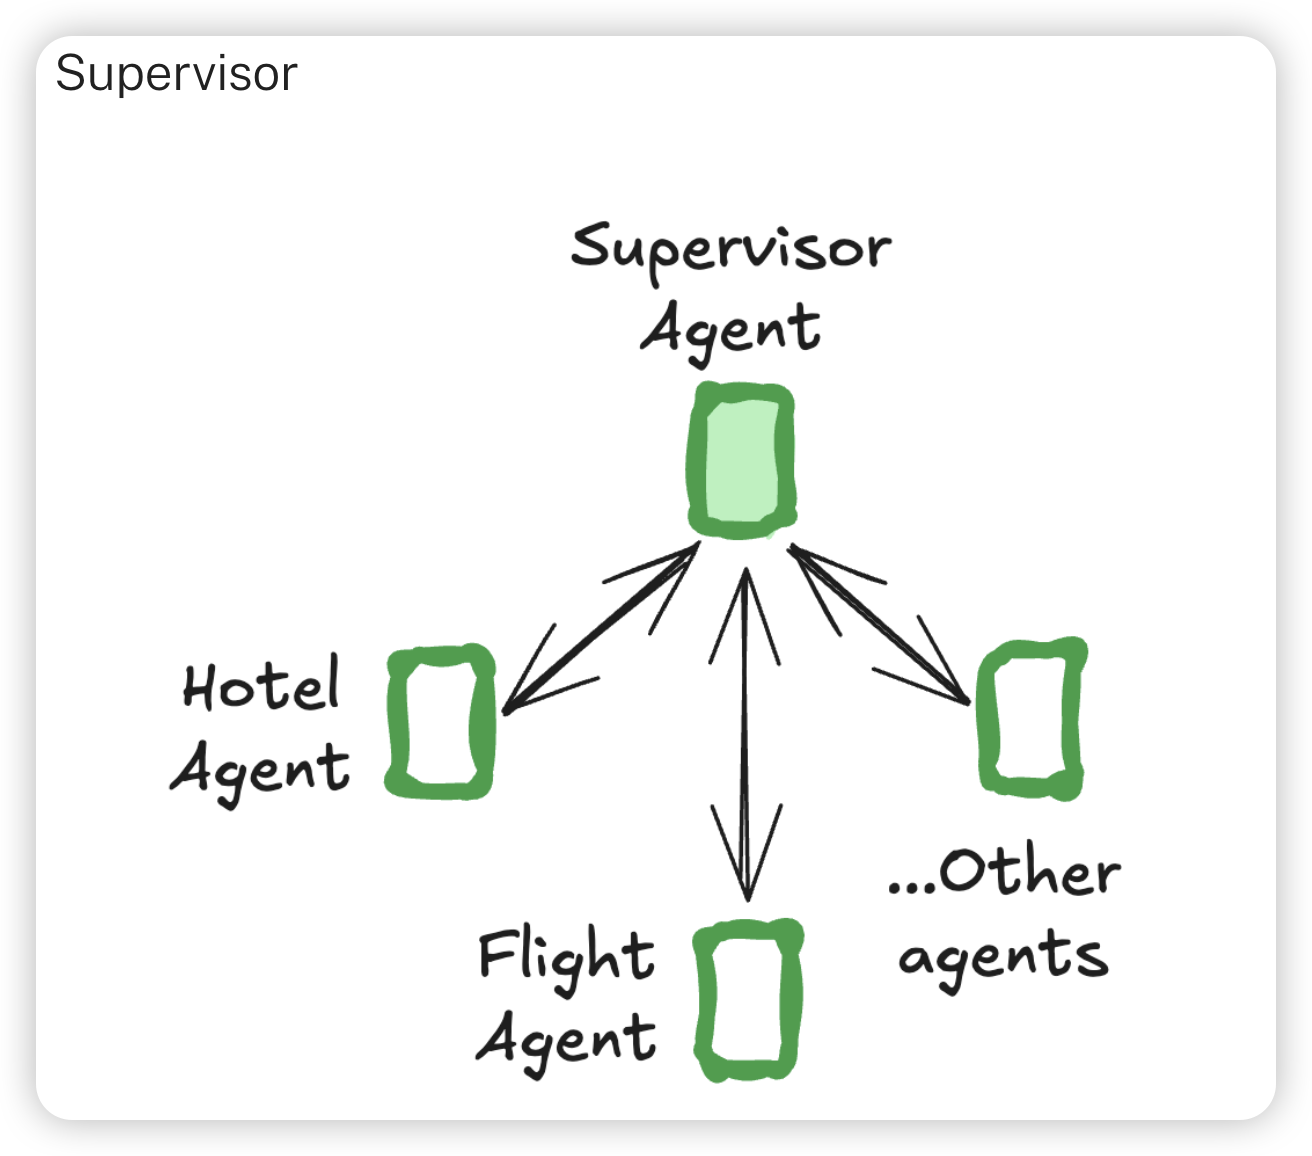

In [1]:
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import create_react_agent
from langgraph_supervisor import create_supervisor

In [12]:
from dotenv import load_dotenv
import os
load_dotenv()

api_key = os.getenv("api_key")
base_url = os.getenv("base_url")

online_llm = ChatOpenAI(
    api_key=api_key,
    model="qwen-plus-latest",
    base_url=base_url,
    temperature=0
)

In [13]:
#定义工具
def book_hotel(hotel_name: str):
    """Book a hotel"""
    return f"Successfully booked a stay at {hotel_name}."

def book_flight(from_airport: str, to_airport: str):
    """Book a flight"""
    return f"Successfully booked a flight from {from_airport} to {to_airport}."

In [14]:
#定义代理,即智能体

flight_assistant = create_react_agent(
    model=online_llm,
    tools=[book_flight],
    prompt="You are a flight booking assistant",
    name="flight_assistant"
)

hotel_assistant = create_react_agent(
    model=online_llm,
    tools=[book_hotel],
    prompt="You are a hotel booking assistant",
    name="hotel_assistant"
)





In [15]:
#创建一个监督者，将智能体和模型组合在一起
supervisor = create_supervisor(
    agents=[flight_assistant, hotel_assistant],
    model=online_llm,
    prompt=(
        "You manage a hotel booking assistant and a"
        "flight booking assistant. Assign work to them."
    )
).compile()

In [25]:
result = supervisor.invoke({
        "messages": [
            {
                "role": "user",
                "content": "book a flight from BOS to JFK and a stay at McKittrick Hotel"
            }
        ]
    })

In [26]:
result['messages'][-1].content

'Your flight from BOS to JFK and your stay at the McKittrick Hotel are being processed. I will confirm the details with you shortly. Is there anything else you would like assistance with?'

In [22]:
for chunk in supervisor.stream(
    {
        "messages": [
            {
                "role": "user",
                "content": "book a flight from BOS to JFK and a stay at McKittrick Hotel"
            }
        ]
    }
):
    print(chunk)
    print("\n")

{'supervisor': {'messages': [HumanMessage(content='book a flight from BOS to JFK and a stay at McKittrick Hotel', additional_kwargs={}, response_metadata={}, id='15a99794-4d69-45c8-b110-1448ffd57818'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_15e31466eb2b48c9b8dc33', 'function': {'arguments': '{}', 'name': 'transfer_to_flight_assistant'}, 'type': 'function', 'index': 0}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 38, 'prompt_tokens': 223, 'total_tokens': 261, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'qwen-plus-latest', 'system_fingerprint': None, 'id': 'chatcmpl-6a7dd565-7359-95d3-bbe9-251cfd4d0fa4', 'finish_reason': 'tool_calls', 'logprobs': None}, name='supervisor', id='run-e0d4de2d-fc81-4b49-8eb7-70f0547f3ad3-0', tool_calls=[{'name': 'transfer_to_flight_assistant', 'args': {}, 'id': 'call_15e31466eb2b48c9b8dc33', 'type': 'tool_call'}], usage_metadata={'input_tokens': 223, 'output_toke